In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import extract_correct_csv


plt.rcParams["figure.autolayout"] = True

In [2]:
data_ = pd.read_csv('data/gaze/fixations.csv')
fixations_real = pd.read_csv('/Users/marcoghezzi/PycharmProjects/pythonProject/fixations_aligned.csv')
subs = extract_correct_csv.extract_only_valid_subject()
trials = [17, 34]
delta_y, delta_x = 1080 / 2 - 676 / 2, 1920 / 2 - 642 / 2
print(len(subs))
len(trials)*len(subs)

30


60

In [ ]:
fig, axs = plt.subplots(len(subs), len(trials), figsize = (8, 150), )

custom_xlim = (0, 700)
custom_ylim = (700,0)

plt.setp(axs, xlim=custom_xlim, ylim=custom_ylim)
i = 0
for sub in subs:
    j = 0
    for trial in trials:
        axs[i,j].grid(False)
        data_sub_trial = data_[(data_.Subject == sub) & (data_.Trial==trial)]
        x_points = data_sub_trial.X_Coord.values-delta_x
        y_points = data_sub_trial.Y_Coord.values-delta_y

        fixations_sub = fixations_real[fixations_real['RECORDING_SESSION_LABEL'] == sub]
        x_points_real = np.array(fixations_sub[fixations_sub['TRIAL_LABEL'] == trial]['CURRENT_FIX_X'] - delta_x)
        y_points_real = np.array(fixations_sub[fixations_sub['TRIAL_LABEL'] == trial]['CURRENT_FIX_Y'] - delta_y)
        string_sub = extract_correct_csv.read_correct_subject_csv(sub)
        true_image = pd.read_csv('data/newLookAtMe/newLookAtMe' + string_sub + '.csv')
        true_image = true_image[true_image['trial'] == trial]['picName'].iloc[0][5:]
        path = '/Users/marcoghezzi/PycharmProjects/pythonProject/osfstorage-archive-info/stim/' + true_image
        picture = np.asarray(Image.open(path))
        axs[i, j].imshow(picture)
        axs[i, j].scatter(x_points_real, y_points_real, color = 'orange')
        for a in range(len(x_points_real)):
            axs[i, j].text(x_points_real[a], y_points_real[a], a+1)
        axs[i, j].plot(x_points_real, y_points_real, color = 'black', linestyle='-', alpha=0.7)
        axs[i, j].set_title(f'Subject: {sub}, trial: {trial}')
        #plt.scatter(x_points, y_points, label='CONVERSANO')
        #plt.scatter(x_points_real, y_points_real, )
        #plt.text(x_)

        #plt.legend()
        j = j+1

    i = i+1



## sPPCA results with gaze

In [4]:
only_gaze_df = pd.read_csv('output/sppca_gaze.csv')
all_views_df = pd.read_csv('output/sppca_physio_gaze.csv')
print(f'only gaze shape: ({only_gaze_df.shape}), all views shape: ({all_views_df.shape})')

only gaze shape: ((630, 6)), all views shape: ((504, 5))


### only gaze, average all subject

In [5]:
def plot_function(df, labelplot1, labelplot2, sub = None):
    columns = ['subject','fold']
    if 'feature' in df.columns:
        columns.append('feature')
    copy_df = df.copy(deep=False)
    if sub:
        copy_df = df[df.subject==sub]
    #print(copy_df.shape)
    gaze_avg = copy_df.drop(columns=columns).groupby(by='k', as_index=False).mean()
    gaze_std = copy_df.drop(columns=columns).groupby(by='k', as_index=False).std()

    X = gaze_avg.k.unique()
    y_1 = gaze_avg.train.values
    deviation_1 = gaze_std.train.values

    y_2 = gaze_avg.test.values
    deviation_2 = gaze_std.test.values

    plt.axes().set_facecolor('#AACAEF')
    plt.plot(X, y_1,'#003566', label=labelplot1)
    plt.fill_between(X, y_1-deviation_1, y_1+deviation_1, alpha=0.08, color = '#003566')
    plt.plot(X, y_2, '#840232', label=labelplot2)
    plt.fill_between(X, y_2-deviation_2, y_2+deviation_2, alpha=0.08, color = '#840232')
    plt.xticks(X)
    plt.grid(visible=None)
    plt.xlabel('Latent space dimension', fontsize=11)
    plt.ylabel('Accuracy', fontsize=11)
    plt.legend()
    plt.show()


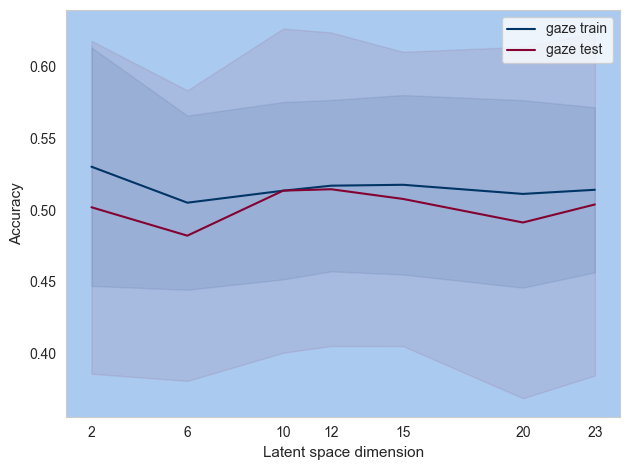

In [6]:
plot_function(only_gaze_df, 'gaze train', 'gaze test')

### only gaze, best subject

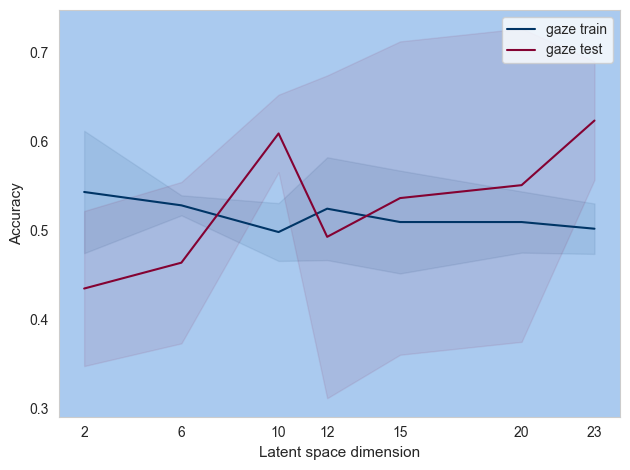

In [7]:
sub = 2
plot_function(only_gaze_df, 'gaze train', 'gaze test', sub)

### all views, average all subjects

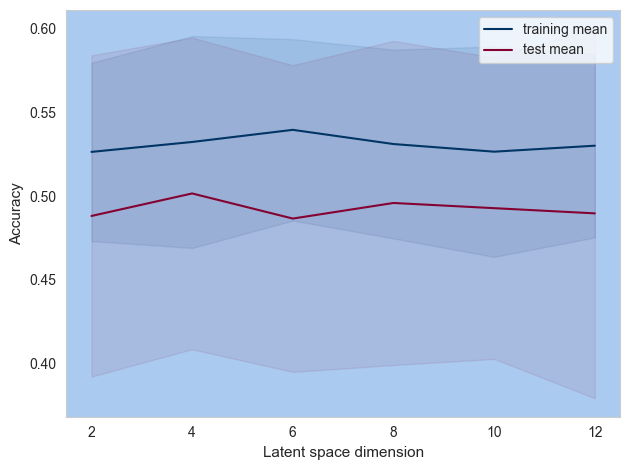

In [8]:
plot_function(all_views_df, 'training mean', 'test mean')

### all views, best subject

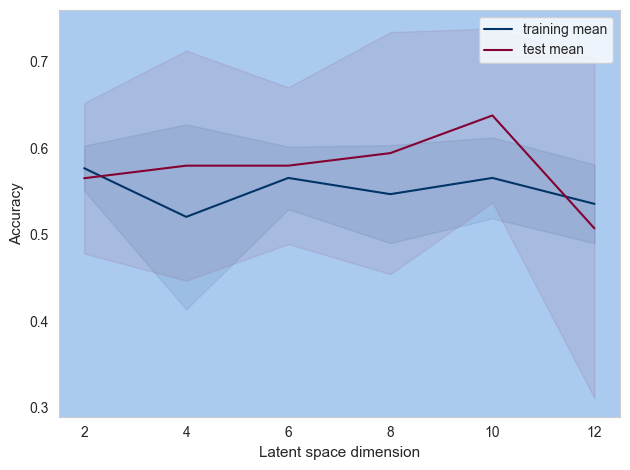

In [9]:
plot_function(all_views_df, 'training mean', 'test mean', 2)

In [31]:
lds_df = pd.read_csv('data/lds_subjects.csv')
sias_df = pd.read_csv('data/sias_score.csv')
list_sub_sias = sias_df.sort_values(by='sias_score', ascending=True)[:10]['subject'].unique()
list_sub_lds = lds_df.sort_values(by='lds', ascending=False)[:10]['subject'].unique()

list_sub_sias_more = sias_df.sort_values(by='sias_score', ascending=False)[:10]['subject'].unique()
list_sub_lds_more = lds_df.sort_values(by='lds', ascending=True)[:10]['subject'].unique()

In [32]:
less_gen_LDS = all_views_df[all_views_df.subject.isin(list_sub_lds)]
less_gen_sias = all_views_df[all_views_df.subject.isin(list_sub_sias)]

more_gen_LDS = all_views_df[all_views_df.subject.isin(list_sub_lds_more)]
more_gen_sias = all_views_df[all_views_df.subject.isin(list_sub_sias_more)]

## Low fear gen subjects

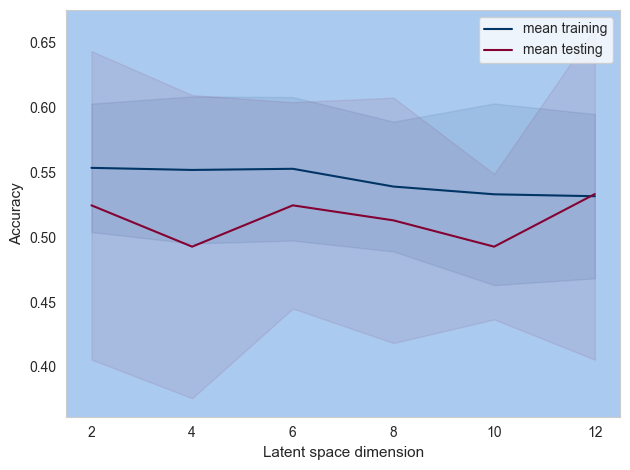

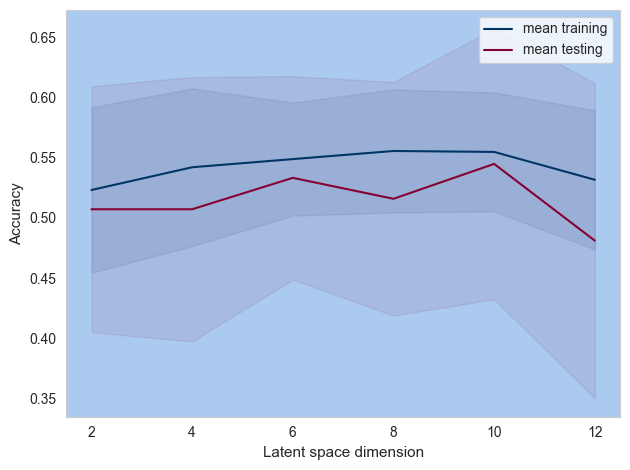

In [34]:
plot_function(less_gen_LDS, 'mean training', 'mean testing')
plot_function(less_gen_sias, 'mean training', 'mean testing')

## High fear subjects

In [39]:
less_gen_sias

,subject,k,fold,train,test
18,2,2,0,0.561798,0.652174
19,2,2,1,0.561798,0.565217
20,2,2,2,0.606742,0.478261
21,2,4,0,0.415730,0.434783
22,2,4,1,0.516854,0.695652
...,...,...,...,...,...
463,51,10,1,0.651685,0.434783
464,51,10,2,0.539326,0.565217
465,51,12,0,0.505618,0.478261
466,51,12,1,0.550562,0.260870


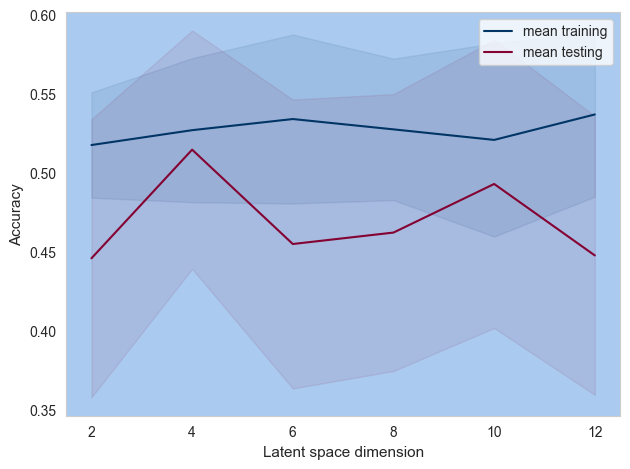

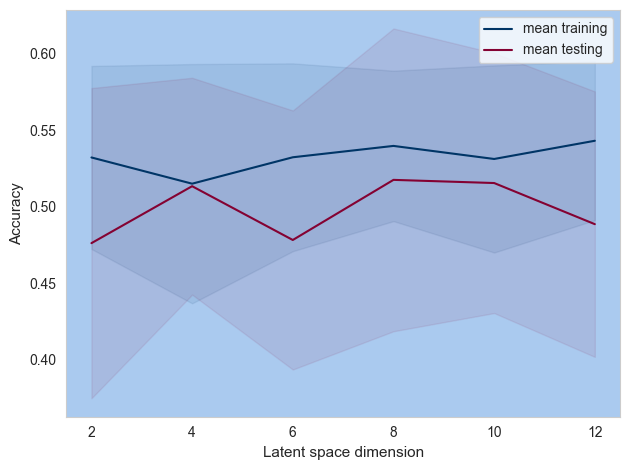

In [35]:
plot_function(more_gen_LDS, 'mean training', 'mean testing')
plot_function(more_gen_sias, 'mean training', 'mean testing')

## Heat map

In [61]:
import numpy as np
import pandas as pd
import extract_correct_csv
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl

In [2]:
subject = 1
fixations = pd.read_csv('/Users/marcoghezzi/PycharmProjects/pythonProject/fixations_aligned.csv')
fix_single_subject = fixations[fixations.RECORDING_SESSION_LABEL==subject]

# extract trials corresponding to each visual stimulus
string_sub = extract_correct_csv.read_correct_subject_csv(subject)
data = pd.read_csv('data/newLookAtMe/newLookAtMe'+string_sub+'.csv')
unique_pic_subject = data.picName.unique()
data

,Unnamed: 0,expName,subject,pairs,cs1,cs2,block,trial,condition,rating,rt,shock,picName,timestamp,morphing level,gender
0,0,LookAtMe,1,1,1,1,1,1,41,1.0,1.412052,False,stim\8 F080C + F101C.jpg,2018-12-18 15:00:50,1,1
1,1,LookAtMe,1,1,1,1,1,2,46,1.0,1.036975,False,stim\7 F080C.jpg,2018-12-18 15:00:59,6,1
2,2,LookAtMe,1,1,1,1,1,3,16,2.0,1.146517,False,stim\1 M024C.jpg,2018-12-18 15:01:07,6,0
3,3,LookAtMe,1,1,1,1,1,4,11,3.0,1.294659,False,stim\2 M024C + M010C.jpg,2018-12-18 15:01:17,1,0
4,4,LookAtMe,1,1,1,1,1,5,41,NaN,-1.000000,False,stim\8 F080C + F101C.jpg,2018-12-18 15:01:25,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,155,LookAtMe,1,1,1,1,2,156,44,2.0,0.430953,False,stim\morph\7&8 40.jpg,2018-12-18 15:27:39,4,1
156,156,LookAtMe,1,1,1,1,2,157,15,2.0,0.326550,False,stim\morph\1&2 20.jpg,2018-12-18 15:27:48,5,0
157,157,LookAtMe,1,1,1,1,2,158,41,1.0,0.351921,False,stim\8 F080C + F101C.jpg,2018-12-18 15:27:58,1,1
158,158,LookAtMe,1,1,1,1,2,159,11,3.0,1.515047,False,stim\2 M024C + M010C.jpg,2018-12-18 15:28:07,1,0


In [3]:
# trials for each stimulus
trials = {}
for stim in unique_pic_subject:
    list_trials = data[data.picName == stim]['trial'].unique()
    trials[stim] = list_trials

12

In [4]:
for x in trials.keys():
    if 'morph' not in x:
        path = '/Users/marcoghezzi/PycharmProjects/pythonProject/osfstorage-archive-info/stim/'+x[5:]
    else:
        continue
    print(trials[x])
    break

[  1   5  12  14  18  21  27  29  36  38  42  48  57  73  85  95 113 132
 135 158]


In [5]:
trial_first_stim = trials[x]
all_fixations = np.array(fix_single_subject[fix_single_subject.TRIAL_LABEL.isin(trial_first_stim)][['CURRENT_FIX_X', 'CURRENT_FIX_Y']])
delta_y, delta_x = 1080 / 2 - 676 / 2, 1920 / 2 - 642 / 2
all_fixations[:,0] = all_fixations[:,0] - delta_x
all_fixations[:,1] = all_fixations[:,1] - delta_y
all_fixations

array([[314., 340.],
       [312., 337.],
       [329., 332.],
       [314., 343.],
       [254., 324.],
       [317., 449.],
       [278., 391.],
       [236., 320.],
       [312., 452.],
       [459., 418.],
       [252., 327.],
       [236., 319.],
       [232., 309.],
       [315., 451.],
       [  9., 797.],
       [ -2., 749.],
       [349., 728.],
       [471., 726.],
       [ 85., 849.],
       [ 34., 911.],
       [248., 377.],
       [243., 324.],
       [320., 337.],
       [321., 338.],
       [311., 418.],
       [252., 313.],
       [326., 441.],
       [250., 301.],
       [245., 317.],
       [320., 424.],
       [252., 319.],
       [384., 323.],
       [251., 319.],
       [309., 428.],
       [ 86., 744.],
       [  0., 733.],
       [347., 723.],
       [455., 720.],
       [545., 707.],
       [315., 395.],
       [206., 851.],
       [307., 852.],
       [436., 831.],
       [327., 349.],
       [315., 343.],
       [321., 338.],
       [323., 332.],
       [319.,

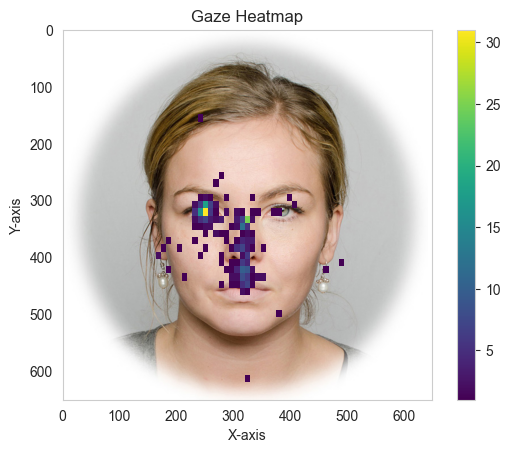

In [73]:
# Load the background image
img = mpimg.imread(path)


# Create a plot
fig, ax = plt.subplots()
#ax.scatter(all_fixations[:,0], all_fixations[:,1], alpha=0.5)
cmap = mpl.cm.viridis
hist = ax.hist2d(all_fixations[:,0], all_fixations[:,1], bins=(60), cmin=1, cmap=cmap)
ax.imshow(img)
ax.set_ylim([650, 0])
ax.set_xlim([0, 650])
fig.colorbar(hist[3])
#im = ax.imshow(heatmap.T, cmap='hot', alpha=0.5, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])


# Set plot title and labels
ax.set_title('Gaze Heatmap')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

# Show the plot
plt.show()
